In [17]:
from obspy.core import read
from matplotlib import cm
from obspy.imaging.spectrogram import spectrogram
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

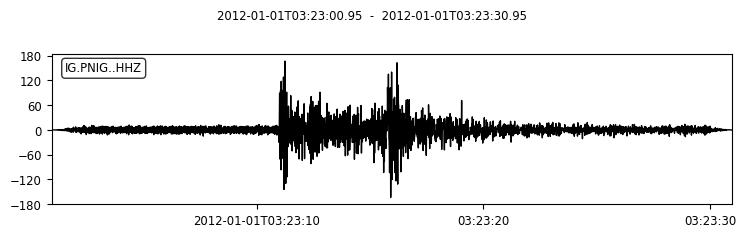

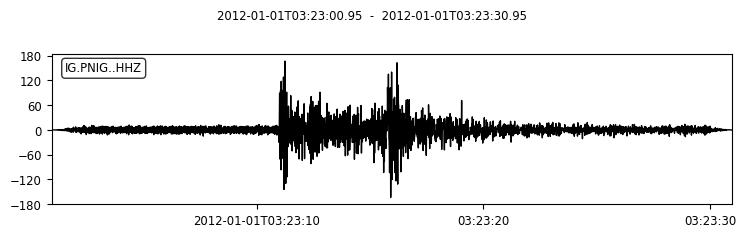

In [18]:
sac=read('event_rank00003_time12164.0HHZ.sac')
sac.detrend()
sac.taper(max_percentage=0.05)
sac.filter("highpass", freq=2.0, zerophase=True)
sac.plot()


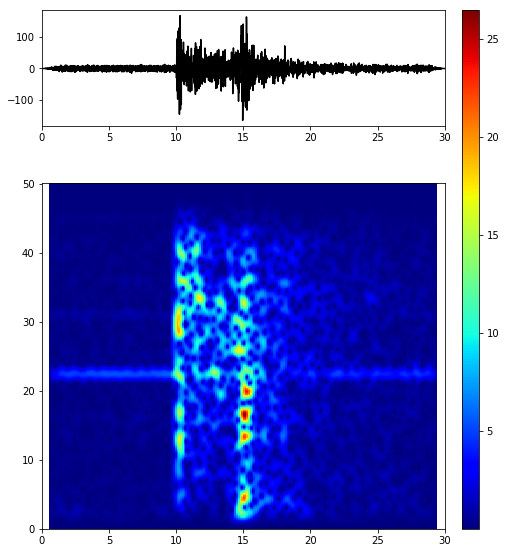

In [19]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1, 0.8, 0.7, 0.2]) #[left bottom width height]
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.9])
j   = cm.get_cmap('jet')

#make time vector
t = np.arange(sac[0].stats.npts) / sac[0].stats.sampling_rate

#plot waveform (top subfigure)    
ax1.plot(t, sac[0].data, 'k')

#plot spectrogram (bottom subfigure)
sac2 = sac[0]
fig = sac.spectrogram(show=False, axes=ax2, cmap=j)
mappable = ax2.images[0]
plt.colorbar(mappable=mappable, cax=ax3)
plt.show()